In [2]:
datadir='/dls/i16/data/2018/mt19259-1/'
import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
#%matplotlib nbagg
%matplotlib notebook 

from matplotlib.pyplot import *
from numpy import *
from dlstools.dataloader import vec2mat
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
from dlstools import dataloader
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus3_100k_path_template)
psnap=dataloader.tiffloader(datadir+'snapped-data/pilatus2M/'+'%05i.tif')
savefolder='/dls/science/users/spc93/processing/'

=== Importing dlstools package


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


<IPython.core.display.Javascript object>


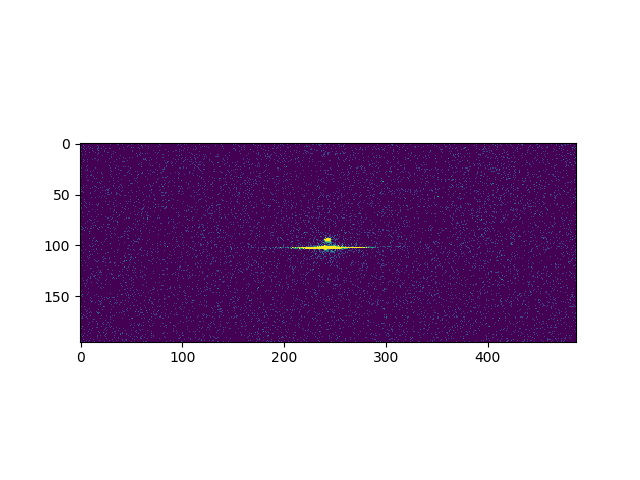

/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


In [43]:
d(709552); 
len(d.path)
p(340); 
figure(); 
dat=p.image_01
std=np.sqrt(dat)
imshow(dat); clim([0,5])



<IPython.core.display.Javascript object>


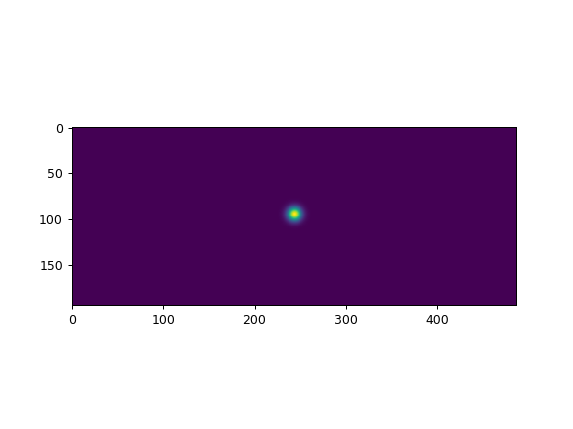

In [86]:
from scipy.ndimage import gaussian_filter
dat_conv2 = gaussian_filter(dat, sigma=5)
figure(); imshow(dat_conv2)

In [76]:
sum(dat)

7108956

In [87]:
sum(dat_conv2)

7076380

<IPython.core.display.Javascript object>


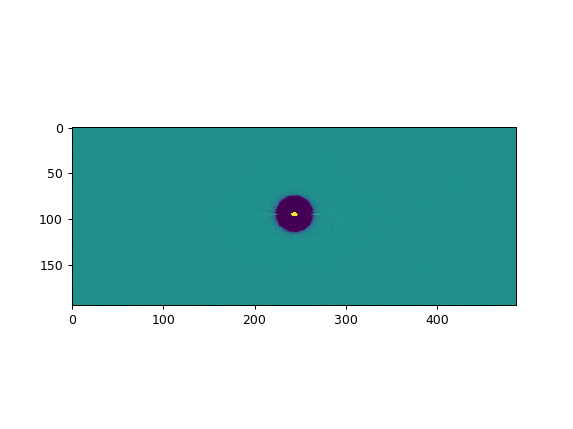

In [88]:
figure(); imshow(dat-dat_conv2); clim([-50,50])

In [80]:
for i in range(600):
    dat_conv2 = gaussian_filter(dat, sigma=10)

<IPython.core.display.Javascript object>


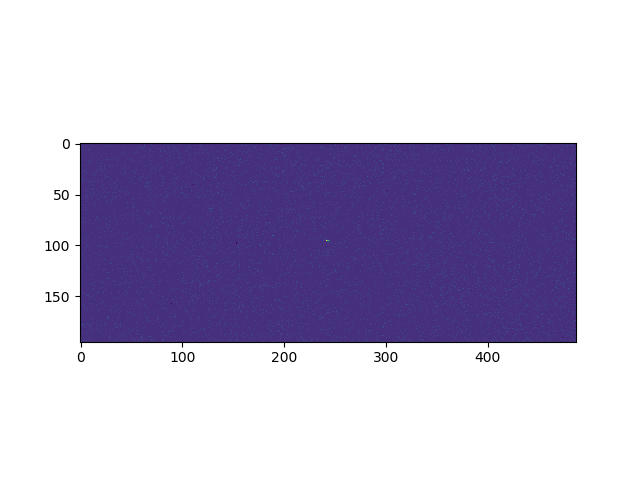

In [15]:
from scipy.ndimage import gaussian_filter

d(709552);
figure();
for frame in d.path[0:10]:
    dat=p(frame).image_01
    dat_conv2 = gaussian_filter(dat, sigma=5)
    #std=np.sqrt(dat)
    imshow(dat-dat_conv2);
    pause(.5)
    

    

<IPython.core.display.Javascript object>


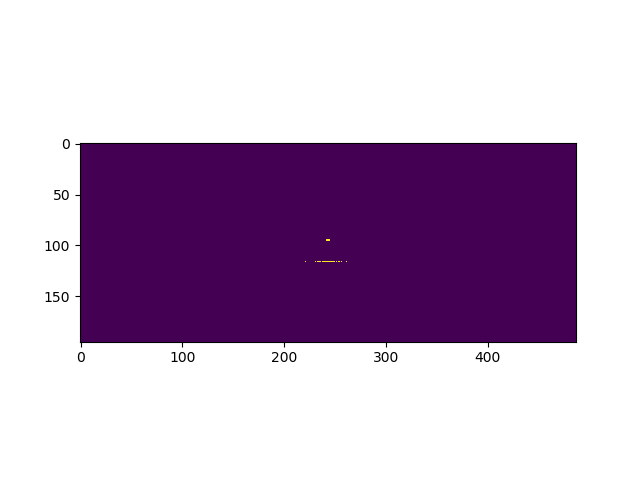

29


/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


In [38]:
from scipy.ndimage import gaussian_filter

frame=410
d(709552);
figure();
dat=p(frame).image_01
dat_conv2 = gaussian_filter(dat, sigma=5)
#std=np.sqrt(dat)
#imshow(dat-dat_conv2); clim([-50,50])
thesh=3.0
pk_pixels =  (dat-dat_conv2) > thesh * sqrt(dat)
pk_pixels = pk_pixels.astype(int)
imshow(pk_pixels)
print sum(pk_pixels)



/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


<IPython.core.display.Javascript object>


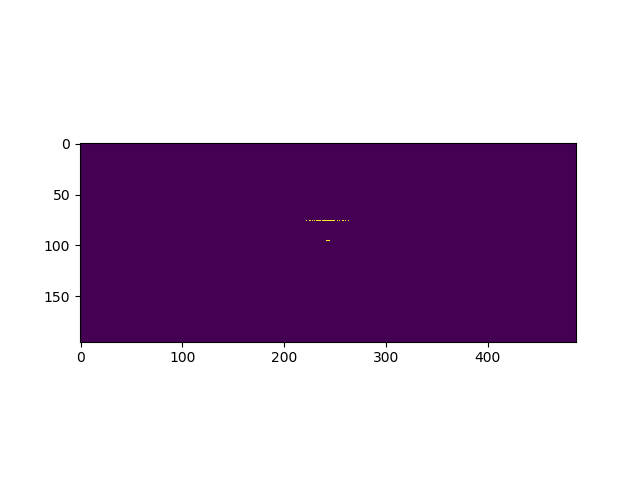

In [29]:
thesh=3.0
pk_pixels =  (dat-dat_conv2) > thesh * sqrt(dat)
figure(); imshow(pk_pixels)

In [34]:
pk_pixels.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt


class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(1, 1)

X = np.random.rand(20, 20, 40)

tracker = IndexTracker(ax, X)


fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [ ]:
#load images and scroll
#find magnetic peak and test peak finder